* This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

* The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variables.

# Importing Required Libraries

In [2]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"]=(15,10)
import seaborn as sns

from IPython.display import display
from sklearn.linear_model import LinearRegression , Lasso , ElasticNet , Ridge , SGDRegressor , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor ,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor , VotingRegressor

# Getting the Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regression_data/train.csv")

original_df = df.copy(deep = True)


target = "y"

features = [i for i in df.columns if i not in [target]]

display(df.head())

print("\n\033[1mThe dataset consists {} features and {} samples".format(df.shape[1],df.shape[0]))
df.shape

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0



The dataset consists 378 features and 4209 samples


(4209, 378)

In [4]:
test_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regression_data/test.csv")

test_csv

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
for i in df.columns[df.nunique().sort_values() > 2]:
  print(i , df[i].dtype)

X375 int64
X376 int64
X377 int64
X378 int64
X379 int64
X380 int64
X382 int64
X383 int64
X384 int64
X385 int64


In [8]:
# checking for non_numerical features
for i in df.columns :
  if df[i].dtype != "int" :
    print(i,df[i].dtype)

y float64
X0 object
X1 object
X2 object
X3 object
X4 object
X5 object
X6 object
X8 object


# Exploratory Data Analysis (EDA)

> Visualizing the data

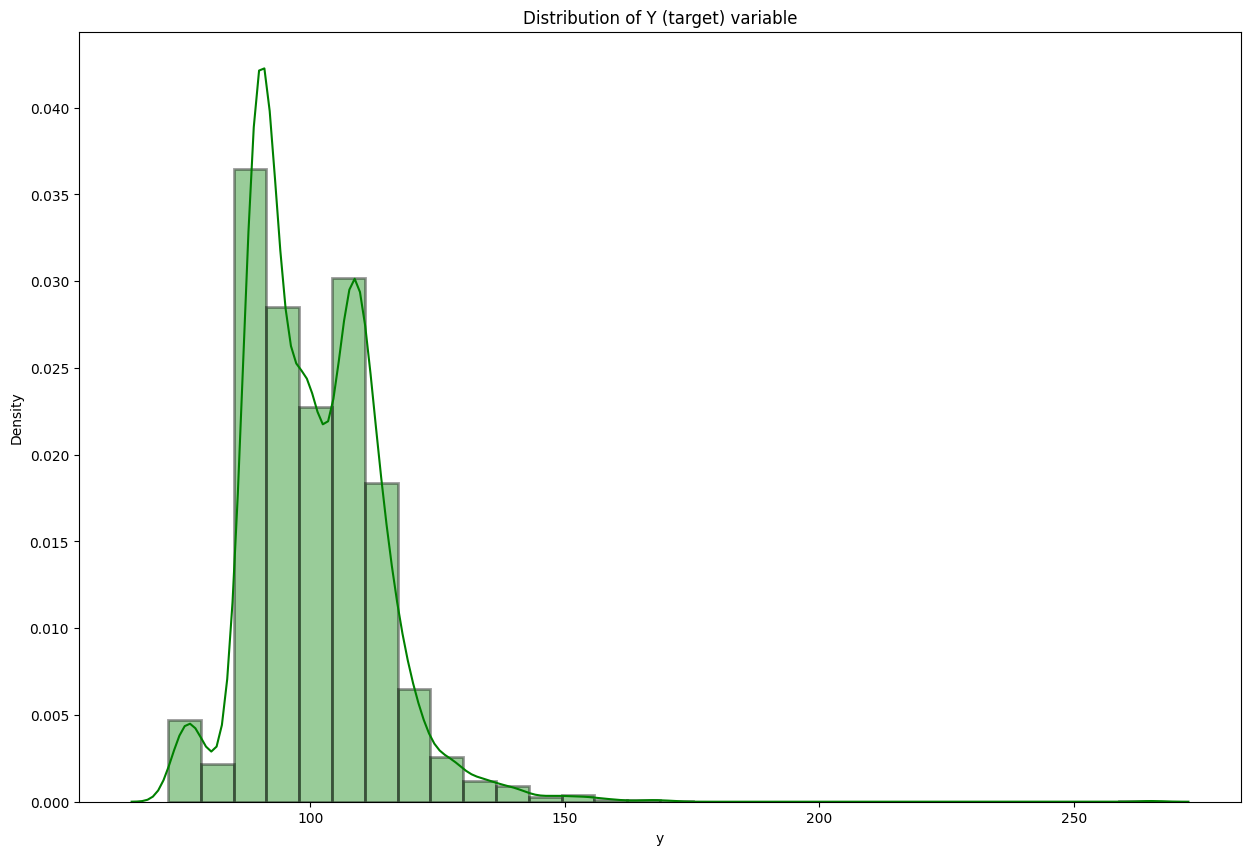


Inference: This represents mean time for testing is at 100.66931812782134


In [7]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize =(15,10))

sns.distplot(df[target],color ="g",bins = 30,hist_kws=dict(linewidth=2,edgecolor = "black"))

plt.title("Distribution of Y (target) variable")
plt.show();

print("\n\033[1mInference:\033[0m This represents mean time for testing is at {}".format(df[target].mean()))

In [9]:
# Dividing features into categorical and numerical features

cf ,nf = [],[]

nu = df[features].nunique().sort_values()


for i in range(df.shape[1]-1):
  if nu.values[i] >=3 and nu.values[i] <= 15 :
    cf.append(nu.index[i])
  else :
    nf.append(nu.index[i])



print("\n\033[1mThe dataset consists of {} categorical features and {} numerical features".format(len(cf),len(nf)))


The dataset consists of 3 categorical features and 374 numerical features


                               Visualising Categorical Features:                                


<Figure size 1500x900 with 0 Axes>

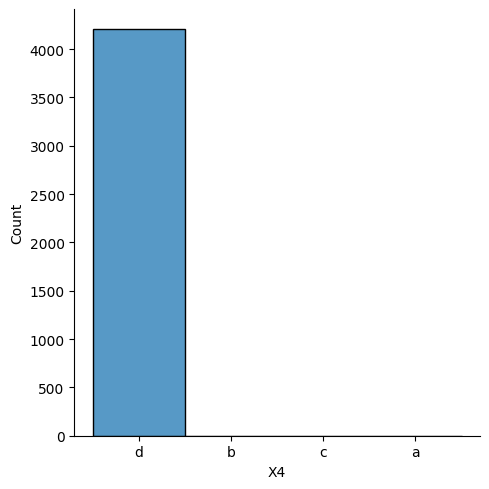

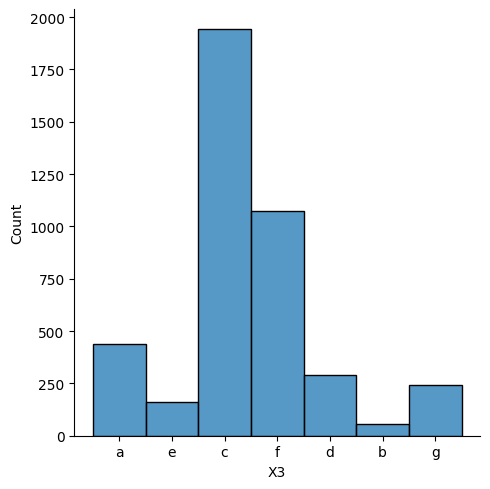

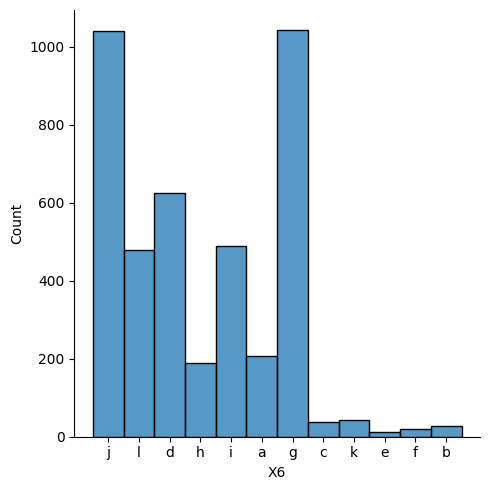

In [10]:
#Visualising the categorical features
import math
print('\033[1mVisualising Categorical Features:'.center(100))

n=1
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
  if df[cf[i]].nunique() <= 15:

    sns.displot(df[cf[i]])
  else:
    plt.subplot(2,1,2)
    sns.displot(df[cf[i]])
plt.tight_layout()
plt.show()

                                  Numeric Features Distribution                                 


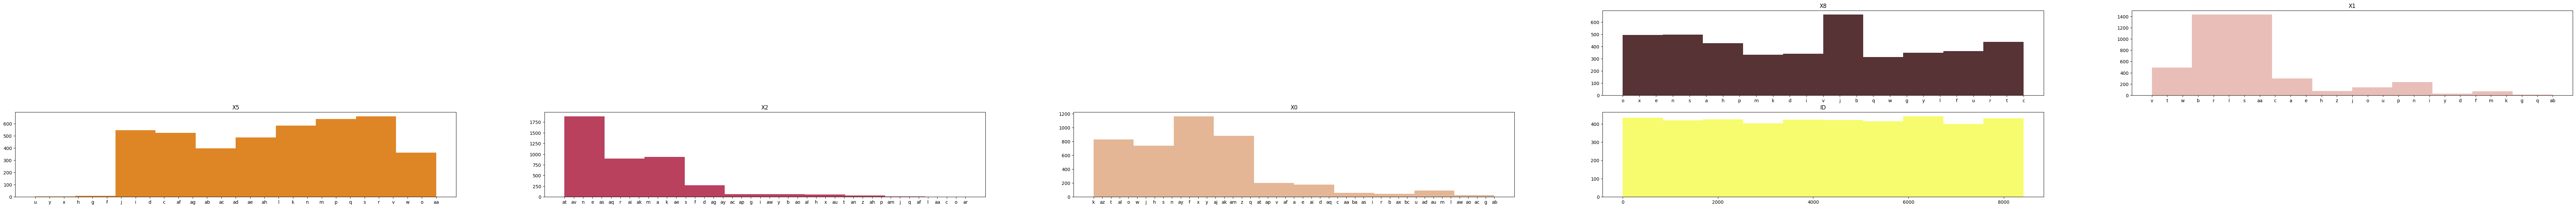

In [11]:
print('\033[1m Numeric Features Distribution'.center(100))

n=5


plt.figure(figsize=(100,500))

for i in range(len(nf)):
  if df[nf[i]].nunique() >= 3:
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    plt.hist(df[nf[i]], color=list(np.random.randint([255,255,255])/255))
    plt.title(nf[i])
# plt.tight_layout()
plt.show()

In [12]:
df.isna().sum() >0 # there are no null values so we not need to impute

,0
ID,False
y,False
X0,False
X1,False
X2,False
X3,False
X4,False
X5,False
X6,False
X8,False


# Data Preprocessing

* Here , first remove duplicates
* we convert categorical features into one_hot enconding or dummy encoding

In [12]:
# Removing duplicates

rs, cs = original_df.shape

df.drop_duplicates( inplace = True)

if df.shape == (rs,cs):
  print("\n\033[1mThe Dataset contains no duplictes")
else:
  print("\n\033[1m the dataset has {} duplicates".format(original_df.shape[0]-df.shape[0]))


The Dataset contains no duplictes


In [14]:
# dummy encoding of categorical features

df1 =df.copy(deep=True)
test_data = test_csv.copy(deep =True)

oh=True
dm=True

for i in cf:
  if df1[i].nunique() <= 2:
    if oh == True:
      print("\033[1mThe One hot Encoding columns: \033[0m ");oh=False
    print(i)
    df1 = pd.concat([df1.drop(i,axis =1),pd.get_dummies(df1[i],prefix=str(i))],axis =1)
    test_data = pd.concat([test_data.drop(i,axis =1),pd.get_dummies(test_data[i],prefix=str(i))],axis =1)

  else:
    if dm == True: print("\033[1mThe Dummy Encoding columns are : \033[0m");dm=False
    print(i)
    df1 = pd.concat([df1.drop(i,axis =1),pd.get_dummies(df1[i],prefix=str(i),drop_first=True)],axis =1)
    test_data = pd.concat([test_data.drop(i,axis =1),pd.get_dummies(test_data[i],prefix=str(i),drop_first = True)],axis =1)

df1.shape,test_data.shape , test_csv.shape

The Dummy Encoding columns are : 
X4
X3
X6


((4209, 395), (4209, 394), (4209, 377))

In [16]:
df1.head()

,ID,y,X0,X1,X2,X5,X8,X10,X11,X12,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,130.81,k,v,at,u,o,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,6,88.53,k,t,av,y,o,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,7,76.26,az,w,n,x,x,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,9,80.62,az,t,n,x,e,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,13,78.02,az,v,n,h,n,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [20]:
for i in nf:
  if df1[i].dtype == "object":
    nf.remove(i)

In [21]:
len(nf)

369

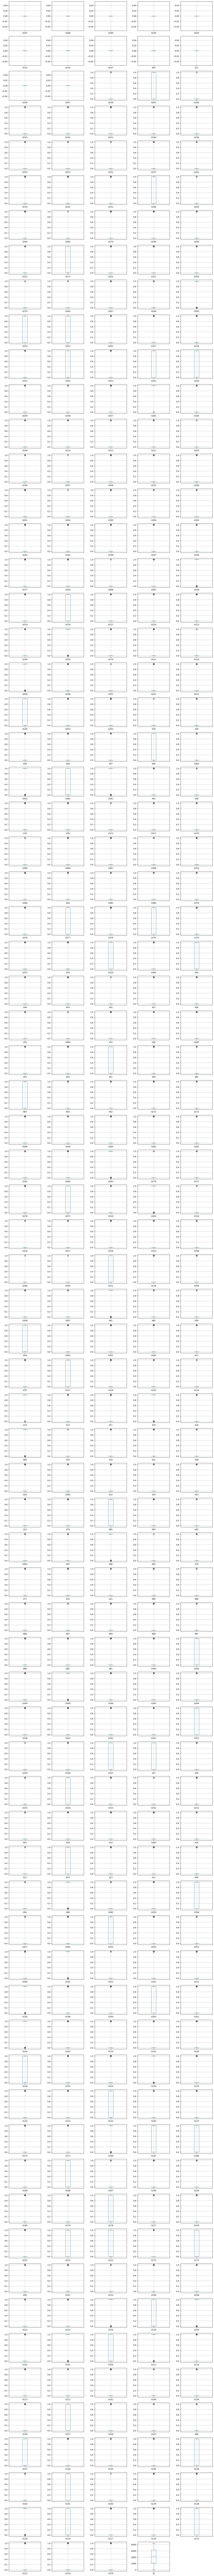

In [22]:
plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df1.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [23]:
# Removal of outliers

df2 = df1.copy(deep=True)

features1 = nf

for i in features1:
  Q1 = df2[i].quantile(0.25)
  Q3 = df2[i].quantile(0.75)
  IQR = Q3 - Q1 # InterQuartile Range
  df2 = df2[df2[i] >= Q1-(1.5*IQR)]
  df2 = df2[df2[i] <= Q3 + (1.5*IQR)]
  df2 = df2.reset_index(drop = True)
display(df2.head())

print("\033[1m Inference:\n \033[1mBefore Removal of outliers , the dataset has {} samples ".format(df1.shape[0]))
print("\033[1m After Removal of outliers , the dataset has {} samples ".format(df2.shape[0]))



,ID,y,X0,X1,X2,X5,X8,X10,X11,X12,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,25,91.91,o,l,as,f,a,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,158,113.40,ak,s,as,j,a,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,208,91.94,n,l,as,j,n,0,0,0,...,False,True,False,False,False,False,False,False,False,False
3,269,116.73,ak,s,as,j,i,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,344,105.87,ak,l,as,i,r,0,0,0,...,False,False,False,False,False,False,True,False,False,False


 Inference:
 Before Removal of outliers , the dataset has 4209 samples 
 After Removal of outliers , the dataset has 112 samples 


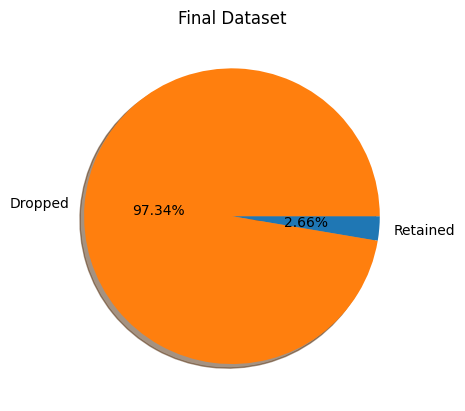

In [24]:
df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df2.shape[0], original_df.shape[0]-df2.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
         autopct='%1.2f%%',pctdistance=0.5, explode=[0,0], shadow=True);



 ## 🔑**Note:** Above outliers are not exact outliers , since the data features are binary so it showing all of them as outliers and removed them , so here we don't need any outliers

In [25]:
df.head()

,ID,y,X0,X1,X2,X5,X8,X10,X11,X12,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,130.81,k,v,at,u,o,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,6,88.53,k,t,av,y,o,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,7,76.26,az,w,n,x,x,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,9,80.62,az,t,n,x,e,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,13,78.02,az,v,n,h,n,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [26]:
df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X5', 'X8', 'X10', 'X11', 'X12',
       ...
       'X6_c', 'X6_d', 'X6_e', 'X6_f', 'X6_g', 'X6_h', 'X6_i', 'X6_j', 'X6_k',
       'X6_l'],
      dtype='object', length=395)

# Data Manipulation

In [27]:
X = df.drop([target],axis =1)
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                 random_state =123,
                                                 test_size = 0.2)
x_train.shape,y_train.shape
print("orginal dataset --> {} ,{} ".format(X.shape,y.shape))
print("Training dataset --> {} ,{}".format(x_train.shape,y_train.shape))
print("Test dataset --> {} ,{}".format(x_test.shape,y_test.shape))

orginal dataset --> (4209, 394) ,(4209,) 
Training dataset --> (3367, 394) ,(3367,)
Test dataset --> (842, 394) ,(842,)


In [28]:
from sklearn.preprocessing import OrdinalEncoder

x_train_ord = OrdinalEncoder().fit_transform(x_train)
x_train_ord = pd.DataFrame(x_train_ord , columns = x_train.columns)
display(x_train_ord.head())
display(x_train_ord.describe())

x_test_ord = OrdinalEncoder().fit_transform(x_test)
x_test_ord = pd.DataFrame(x_test_ord , columns = x_test.columns)
display(x_test_ord.head())
display(x_test_ord.describe())


# test_data ordinal encoding
test_data_ord = OrdinalEncoder().fit_transform(test_data)
test_data_ord = pd.DataFrame(test_data_ord,columns = test_data.columns)
display(test_data_ord)

,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,1032.0,6.0,20.0,16.0,2.0,21.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,699.0,7.0,23.0,36.0,6.0,8.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,797.0,33.0,23.0,16.0,6.0,23.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1632.0,43.0,3.0,28.0,16.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2919.0,43.0,3.0,16.0,25.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.0,3367.000000,3367.000000,...,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000
mean,1683.000000,28.672409,11.112266,16.843481,13.370359,11.651025,0.013959,0.0,0.074844,0.058806,...,0.008910,0.152064,0.002970,0.004158,0.247698,0.047223,0.115236,0.246510,0.008613,0.111375
std,972.113505,13.812703,8.536169,10.223215,8.243241,7.041363,0.117338,0.0,0.263179,0.235296,...,0.093985,0.359136,0.054425,0.064358,0.431740,0.212147,0.319354,0.431043,0.092419,0.314643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,841.500000,18.000000,3.000000,8.000000,5.000000,5.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1683.000000,34.000000,13.000000,16.000000,15.000000,12.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2524.500000,42.000000,20.000000,24.000000,21.000000,18.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3366.000000,45.000000,26.000000,41.000000,28.000000,24.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,258.0,6.0,20.0,28.0,1.0,8.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362.0,31.0,3.0,2.0,4.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,539.0,41.0,2.0,25.0,15.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,402.0,17.0,20.0,26.0,14.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,705.0,16.0,16.0,10.0,20.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.0,842.000000,842.000000,...,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,420.500000,26.033254,9.421615,11.864608,11.966746,11.452494,0.010689,0.0,0.076010,0.054632,...,0.009501,0.134204,0.002375,0.007126,0.247031,0.036817,0.118765,0.248219,0.016627,0.122328
std,243.208758,12.271167,7.388274,8.442050,7.234403,7.025908,0.102894,0.0,0.265171,0.227395,...,0.097068,0.341074,0.048708,0.084164,0.431541,0.188424,0.323704,0.432236,0.127946,0.327859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.250000,16.000000,2.000000,5.000000,5.000000,5.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,420.500000,29.500000,11.000000,10.000000,13.000000,11.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,630.750000,38.000000,17.000000,17.000000,19.000000,18.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,841.000000,41.000000,23.000000,33.000000,23.000000,24.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0.0,21.0,23.0,34.0,26.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,42.0,3.0,8.0,9.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,21.0,23.0,17.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,21.0,13.0,34.0,31.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,45.0,20.0,17.0,30.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,4204.0,6.0,9.0,17.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4205,4205.0,42.0,1.0,8.0,1.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4206,4206.0,47.0,23.0,17.0,1.0,22.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4207,4207.0,7.0,23.0,17.0,1.0,16.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Feature Scaling Standardization

from sklearn.preprocessing import StandardScaler

print("\033[1mStandardization on Training set: ".center(100))
x_train_std = StandardScaler().fit_transform(x_train_ord)
x_train_std = pd.DataFrame(x_train_std , columns = x_train.columns)
display(x_train_std.head())
display(x_train_std.describe())

print("\033[1mStandardization on Test set: ".center(100))
x_test_std = StandardScaler().fit_transform(x_test_ord)
x_test_std = pd.DataFrame(x_test_std , columns = x_test.columns)
display(x_test.head())
display(x_test_std.describe())

print("\033[1mStandardization on evaluation set: ".center(100))
test_data_std = StandardScaler().fit_transform(test_data_ord)
test_data_std = pd.DataFrame(test_data_std,columns = test_data.columns)
display(test_data_std.head())

                               Standardization on Training set:                                 


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,-0.669774,-1.641661,1.041340,-0.082519,-1.379560,1.327920,-0.118982,0.0,-0.284427,-0.249961,...,-0.094816,-0.423479,-0.054579,-0.064617,1.742748,-0.222629,-0.360895,-0.571977,-0.093209,-0.354026
1,-1.012378,-1.569253,1.392838,1.874104,-0.894242,-0.518588,-0.118982,0.0,3.515837,4.000631,...,-0.094816,2.361392,-0.054579,-0.064617,-0.573806,-0.222629,-0.360895,-0.571977,-0.093209,-0.354026
2,-0.911552,0.313352,1.392838,-0.082519,-0.894242,1.611998,-0.118982,0.0,-0.284427,4.000631,...,-0.094816,-0.423479,-0.054579,-0.064617,-0.573806,-0.222629,-0.360895,-0.571977,10.728628,-0.354026
3,-0.052471,1.037431,-0.950482,1.091455,0.319053,-0.660627,-0.118982,0.0,-0.284427,-0.249961,...,10.546721,-0.423479,-0.054579,-0.064617,-0.573806,-0.222629,-0.360895,-0.571977,-0.093209,-0.354026
4,1.271645,1.037431,-0.950482,-0.082519,1.411019,0.475685,-0.118982,0.0,-0.284427,-0.249961,...,-0.094816,-0.423479,-0.054579,-0.064617,-0.573806,4.491781,-0.360895,-0.571977,-0.093209,-0.354026


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
count,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367.0,3.367000e+03,3.367000e+03,...,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03
mean,-2.110314e-18,5.064754e-17,-4.642691e-17,-4.695449e-17,-1.688251e-17,4.642691e-17,-6.067153e-17,0.0,7.491615e-17,-1.635493e-17,...,-2.426861e-17,-8.441256e-18,8.441256e-18,-1.477220e-17,5.803364e-17,-1.899283e-17,-2.110314e-17,4.220628e-17,-3.112713e-17,-2.110314e-17
std,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,0.0,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-1.731536e+00,-2.076108e+00,-1.301979e+00,-1.647817e+00,-1.622219e+00,-1.654900e+00,-1.189816e-01,0.0,-2.844273e-01,-2.499606e-01,...,-9.481620e-02,-4.234790e-01,-5.457884e-02,-6.461707e-02,-5.738065e-01,-2.226288e-01,-3.608948e-01,-5.719773e-01,-9.320857e-02,-3.540257e-01
25%,-8.657682e-01,-7.727665e-01,-9.504815e-01,-8.651676e-01,-1.015572e+00,-9.447052e-01,-1.189816e-01,0.0,-2.844273e-01,-2.499606e-01,...,-9.481620e-02,-4.234790e-01,-5.457884e-02,-6.461707e-02,-5.738065e-01,-2.226288e-01,-3.608948e-01,-5.719773e-01,-9.320857e-02,-3.540257e-01
50%,0.000000e+00,3.857596e-01,2.211782e-01,-8.251868e-02,1.977235e-01,4.956813e-02,-1.189816e-01,0.0,-2.844273e-01,-2.499606e-01,...,-9.481620e-02,-4.234790e-01,-5.457884e-02,-6.461707e-02,-5.738065e-01,-2.226288e-01,-3.608948e-01,-5.719773e-01,-9.320857e-02,-3.540257e-01
75%,8.657682e-01,9.650227e-01,1.041340e+00,7.001303e-01,9.257006e-01,9.018024e-01,-1.189816e-01,0.0,-2.844273e-01,-2.499606e-01,...,-9.481620e-02,-4.234790e-01,-5.457884e-02,-6.461707e-02,-5.738065e-01,-2.226288e-01,-3.608948e-01,-5.719773e-01,-9.320857e-02,-3.540257e-01
max,1.731536e+00,1.182246e+00,1.744336e+00,2.363259e+00,1.775007e+00,1.754037e+00,8.404659e+00,0.0,3.515837e+00,4.000631e+00,...,1.054672e+01,2.361392e+00,1.832212e+01,1.547579e+01,1.742748e+00,4.491781e+00,2.770891e+00,1.748321e+00,1.072863e+01,2.824653e+00


                                 Standardization on Test set:                                   


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
1259,2493,ak,v,r,ab,i,0,0,1,1,...,False,True,False,False,False,False,False,False,False,False
1793,3596,o,c,ae,ae,m,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2720,5436,z,b,m,m,j,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2024,4050,az,v,n,l,s,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3578,7160,ay,r,as,r,f,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
count,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,842.0,8.420000e+02,8.420000e+02,...,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02,8.420000e+02
mean,-8.438750e-18,-1.223619e-16,-5.696156e-17,-2.848078e-17,-3.533726e-17,-9.388109e-17,4.219375e-18,0.0,9.493594e-18,5.907125e-17,...,-3.797437e-17,-5.063250e-17,-2.109687e-17,-3.164531e-17,7.383906e-17,4.535828e-17,-8.438750e-18,-7.383906e-18,3.480984e-17,-1.265812e-17
std,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,0.0,1.000594e+00,1.000594e+00,...,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00,1.000594e+00
min,-1.729995e+00,-2.122759e+00,-1.275970e+00,-1.406253e+00,-1.655127e+00,-1.631007e+00,-1.039438e-01,0.0,-2.868139e-01,-2.403933e-01,...,-9.794042e-02,-3.937091e-01,-4.879500e-02,-8.471737e-02,-5.727789e-01,-1.955107e-01,-3.671115e-01,-5.746075e-01,-1.300316e-01,-3.733330e-01
25%,-8.649975e-01,-8.181143e-01,-1.005110e+00,-8.136280e-01,-9.635745e-01,-9.189317e-01,-1.039438e-01,0.0,-2.868139e-01,-2.403933e-01,...,-9.794042e-02,-3.937091e-01,-4.879500e-02,-8.471737e-02,-5.727789e-01,-1.955107e-01,-3.671115e-01,-5.746075e-01,-1.300316e-01,-3.733330e-01
50%,0.000000e+00,2.826794e-01,2.137607e-01,-2.210028e-01,1.429100e-01,-6.444192e-02,-1.039438e-01,0.0,-2.868139e-01,-2.403933e-01,...,-9.794042e-02,-3.937091e-01,-4.879500e-02,-8.471737e-02,-5.727789e-01,-1.955107e-01,-3.671115e-01,-5.746075e-01,-1.300316e-01,-3.733330e-01
75%,8.649975e-01,9.757718e-01,1.026341e+00,6.086725e-01,9.727734e-01,9.324628e-01,-1.039438e-01,0.0,-2.868139e-01,-2.403933e-01,...,-9.794042e-02,-3.937091e-01,-4.879500e-02,-8.471737e-02,-5.727789e-01,-1.955107e-01,-3.671115e-01,-5.746075e-01,-1.300316e-01,-3.733330e-01
max,1.729995e+00,1.220393e+00,1.838921e+00,2.505073e+00,1.526016e+00,1.786953e+00,9.620580e+00,0.0,3.486581e+00,4.159849e+00,...,1.021029e+01,2.539946e+00,2.049390e+01,1.180395e+01,1.745874e+00,5.114811e+00,2.723968e+00,1.740318e+00,7.690439e+00,2.678574e+00


                              Standardization on evaluation set:                                


,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,-1.731639,-0.625211,1.395760,1.586068,1.266652,1.488396,-0.139195,-0.015416,-0.283441,-0.255011,...,-0.097952,-0.40337,-0.063682,-0.077299,-0.584941,-0.233715,-0.362982,-0.558965,-0.127184,-0.355817
1,-1.730816,0.754609,-0.945199,-0.956445,-0.695011,1.773477,-0.139195,-0.015416,-0.283441,-0.255011,...,-0.097952,-0.40337,-0.063682,-0.077299,1.709575,-0.233715,-0.362982,-0.558965,-0.127184,-0.355817
2,-1.729993,-0.625211,1.395760,-0.076345,-1.733538,-0.364632,-0.139195,-0.015416,-0.283441,-0.255011,...,-0.097952,-0.40337,-0.063682,-0.077299,-0.584941,-0.233715,-0.362982,1.789022,-0.127184,-0.355817
3,-1.729170,-0.625211,0.225281,1.586068,1.843611,0.205531,-0.139195,-0.015416,-0.283441,-0.255011,...,-0.097952,-0.40337,-0.063682,-0.077299,-0.584941,-0.233715,-0.362982,-0.558965,-0.127184,2.810431
4,-1.728347,0.951726,1.044616,-0.076345,1.728219,0.062990,-0.139195,-0.015416,-0.283441,-0.255011,...,-0.097952,-0.40337,-0.063682,-0.077299,-0.584941,-0.233715,2.754958,-0.558965,-0.127184,-0.355817


In [35]:
#Checking the correlation
df3 = pd.concat([x_train_std,x_test_std])
print('\033[1mCorrelation Matrix'.center(200))
plt.figure(figsize = (80,80))
sns.heatmap(df3.corr()[:60], vmin = -1 , vmax =1 ,center =0 ,annot =True)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [36]:
df3.corr()

,ID,X0,X1,X2,X5,X8,X10,X11,X12,X13,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
ID,1.000000,-0.013646,0.085237,-0.021561,0.648901,0.006302,0.002704,NaN,0.059237,-0.032080,...,0.005884,0.030806,-0.004581,-0.010638,-0.022057,-0.002790,-0.027770,-0.030976,-0.004712,0.048908
X0,-0.013646,1.000000,-0.270024,-0.140766,0.012175,0.047253,0.080871,NaN,-0.134309,-0.130491,...,-0.034851,-0.007255,-0.012994,0.031468,-0.014673,-0.016394,-0.047824,0.043671,-0.040577,0.049959
X1,0.085237,-0.270024,1.000000,0.090044,0.045804,-0.000042,-0.136012,NaN,0.112621,0.286950,...,-0.018895,0.001608,0.040603,0.095844,0.043072,-0.006611,0.044463,-0.063420,0.023608,-0.075095
X2,-0.021561,-0.140766,0.090044,1.000000,-0.018113,-0.070256,0.046740,NaN,0.128932,0.219886,...,-0.005493,-0.027574,0.008524,-0.008011,-0.038743,0.112871,0.001434,0.017929,0.006941,0.025144
X5,0.648901,0.012175,0.045804,-0.018113,1.000000,0.012028,-0.007327,NaN,0.059785,-0.003253,...,0.009566,0.035395,-0.004378,-0.011939,-0.016420,-0.014262,-0.019191,-0.015779,-0.006827,0.024225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X6_h,-0.002790,-0.016394,-0.006611,0.112871,-0.014262,0.012470,-0.015708,NaN,-0.027819,0.029391,...,-0.020717,-0.090817,-0.011629,-0.014821,-0.124593,1.000000,-0.078631,-0.124339,-0.021685,-0.077651
X6_i,-0.027770,-0.047824,0.044463,0.001434,-0.019191,-0.003970,-0.022957,NaN,0.034587,0.005477,...,-0.034566,-0.151172,-0.019340,-0.024876,-0.207722,-0.078631,1.000000,-0.207328,-0.036459,-0.129624
X6_j,-0.030976,0.043671,-0.063420,0.017929,-0.015779,0.003605,-0.012103,NaN,-0.117060,-0.036097,...,-0.054642,-0.239021,-0.030582,-0.039304,-0.328388,-0.124339,-0.207328,1.000000,-0.057595,-0.204900
X6_k,-0.004712,-0.040577,0.023608,0.006941,-0.006827,0.032548,0.010340,NaN,0.002136,0.016071,...,-0.009617,-0.041817,-0.005339,-0.007022,-0.057684,-0.021685,-0.036459,-0.057595,1.000000,-0.036108


# Feature Selection

In [38]:
Trr=[]; Tss=[]; n=3
# order=['ord-'+str(i) for i in range(2,n)]
# Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
# Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[]

for i in range(len(x_train_std.columns)-100):
    vif = pd.DataFrame()
    X = x_train_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(x_train_std.drop(DROP,axis=1), y_train)

        pred1 = LR.predict(x_train_std.drop(DROP,axis=1))
        pred2 = LR.predict(x_test_std.drop(DROP,axis=1))

        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

        # Trd.loc[i,'ord-'+str(i)] = round(np.sqrt(mean_squared_error(y_train, pred1)),2)
        # Tsd.loc[i,'ord-'+str(i)] = round(np.sqrt(mean_squared_error(y_test ,pred2)),2)

print('Dropped Features --> ',DROP)
# plt.plot(b)
# plt.show()
# print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.ylim([19.75,25.75])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

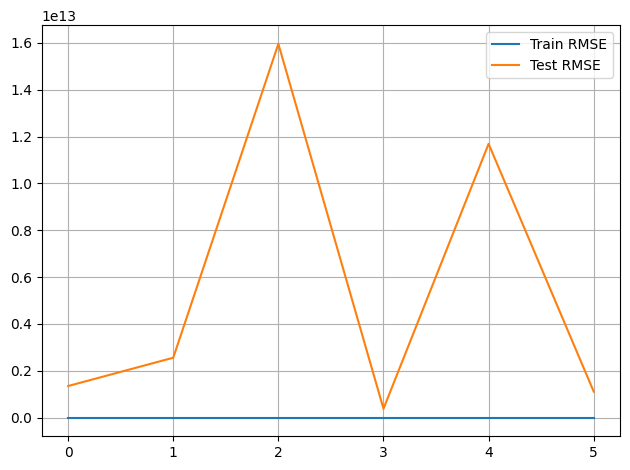

In [39]:
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
# plt.ylim([19.75,25.75])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [40]:
from sklearn.decomposition import PCA

Trr =[]; Tss =[];
m = df.shape[1]-2
for i in range(m):
  pca = PCA(n_components = m-i)
  x_train_std_pca = pca.fit_transform(x_train_std)
  x_test_std_pca = pca.fit_transform(x_test_std)


  lr = LinearRegression()

  lr.fit(x_train_std_pca,y_train)

  preds1 = lr.predict(x_train_std_pca)
  preds2 = lr.predict(x_test_std_pca)


  Trr.append(round(np.sqrt(mean_squared_error(y_train,preds1)),2))
  Tss.append(round(np.sqrt(mean_squared_error(y_test,preds2)),2))

plt.plot(Trr , label = "Train_RMSE")
plt.plot(Tss , label = "Test_RMSE")

plt.figure(figsize=(15,10))

plt.legend()
plt.grid()
plt.show()




KeyboardInterrupt: 

# Predictive Modelling


In [44]:
# #Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=x_train_std.shape[1]-2)             # running RFE
rfe = rfe.fit(x_train_std, y_train)

LR = LinearRegression()
LR.fit(x_train_std.loc[:,rfe.support_], y_train)



pred1 = LR.predict(x_train_std.loc[:,rfe.support_])
pred2 = LR.predict(x_test_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(y_train, pred1)))
print(np.sqrt(mean_squared_error(y_test, pred2)))


8.199022445923932
12335549610893.604


In [47]:
# Let us first define a function for Evaluation

from sklearn.metrics import r2_score


Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros((9,8)),columns = ["Train_R2","Test_R2","Train_RSS","Test_RSS","Train_MSE",
                                                                             "Test_MSE","Train_RMSE","Test_RMSE"])

def Evaluate(n,preds1,preds2):
  rc = np.random.choice(x_train_std.loc[:,x_train_std.nunique()>=50].columns.values , 3)

  plt.figure(figsize = (15,6))
  for i,e in enumerate(rc):
    plt.subplot(2,3 ,i+1)
    plt.scatter(x_train_std[e],y_train,label = "Actual")
    plt.scatter(x_train_std[e],preds1 , label = "Predictions")
    plt.title(e)
    plt.legend()
  plt.show()


  #Evaluating the Multiple Linear Regression Model

  print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
  print("\n R2_Score on Traning Set ---> {}".format(round(r2_score(y_train,preds1),20)))
  print("Residual Sum of Squares RSS on Training Set ---> {}".format(round(sum(np.square(y_train-preds1)),20)))
  print("Mean Squared Error on Training Set ---> {}".format(round(mean_squared_error(y_train,preds1),5)))
  print("Root Mean Squared Error on Training Set ---> {}".format(round(np.sqrt(mean_squared_error(y_train,preds1)),5)))
  print('\n\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
  print("\n R2_Score on Testing Set ---> {}".format(round(r2_score(y_test,preds2),20)))
  print("Residual Sum of Squares RSS on Testing Set ---> {}".format(round(sum(np.square(y_test-preds2)),20)))
  print("Mean Squared Error on Testing Set ---> {}".format(round(mean_squared_error(y_test,preds2),5)))
  print("Root Mean Squared Error on Testing Set ---> {}".format(round(np.sqrt(mean_squared_error(y_test,preds2)),5)))



  print('\n\n{}Plotting Residual Plots{}'.format('-'*20, '-'*20))
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_R2']  = round(r2_score(y_train, preds1),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_R2']   = round(r2_score(y_test, preds2),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_RSS'] = round(np.sum(np.square(y_train-preds1)),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_RSS']  = round(np.sum(np.square(y_test-preds2)),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_MSE'] = round(mean_squared_error(y_train, preds1),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_MSE']  = round(mean_squared_error(y_test, preds2),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_RMSE']= round(np.sqrt(mean_squared_error(y_train, preds1)),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_RMSE'] = round(np.sqrt(mean_squared_error(y_test, preds2)),20)

  # Plotting y_test and y_pred to understand the spread.
  plt.figure(figsize=[15,4])

  plt.subplot(1,2,1)
  sns.distplot((y_train - preds1))
  plt.title('Error Terms')
  plt.xlabel('Errors')

  plt.subplot(1,2,2)
  plt.scatter(y_train,preds1)
  plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
  plt.title('Test vs Prediction')
  plt.xlabel('y_test')
  plt.ylabel('y_pred')
  plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-4.93277051e-01  9.12118021e-01 -4.41848857e-01  2.40626877e-01
 -9.57094028e-02  1.33858338e-02 -2.47260345e+12  4.69492797e+13
 -5.54582035e+12 -4.14484101e+12 -1.04185911e+13 -1.03328296e+13
 -1.08817339e+12 -4.46184336e+12 -1.84485150e+12 -6.30007819e+12
 -7.38767351e+12  8.69415460e+12 -5.98608773e+12 -3.04881069e+12
  3.24167930e+11 -1.44938481e+12  8.38412556e-02 -3.82790093e+12
 -6.64316794e+12 -1.36420761e+12  4.77451508e+12 -2.32529780e+12
 -7.06825562e+12 -1.40357019e+12 -4.74869177e+12 -1.44938481e+12
 -2.58233144e+10 -2.20458984e-01  7.06825562e+12 -5.56124971e+11
 -2.31500206e+12  2.53601074e-02 -2.19238281e-01 -4.87593265e+12
 -2.48242188e+00  2.78724670e-01  6.43310547e-01 -1.39042122e+12
  1.44787598e+00 -6.83593750e-02  9.52148438e-02 -1.13870343e+12
  1.27069460e+13 -1.24190048e+13 -1.86523

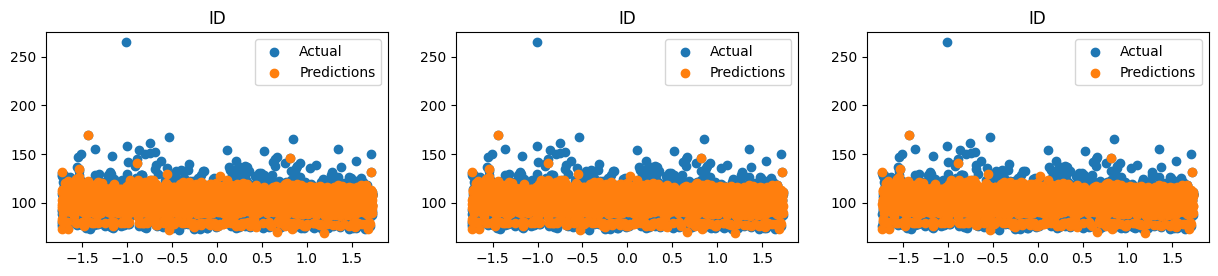



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.5889635164874817
Residual Sum of Squares RSS on Training Set ---> 226343.10385453017
Mean Squared Error on Training Set ---> 67.22397
Root Mean Squared Error on Training Set ---> 8.19902


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> -1.0182445398068556e+24
Residual Sum of Squares RSS on Testing Set ---> 1.281235902987721e+29
Mean Squared Error on Testing Set ---> 1.5216578420281734e+26
Root Mean Squared Error on Testing Set ---> 12335549610893.604


--------------------Plotting Residual Plots--------------------


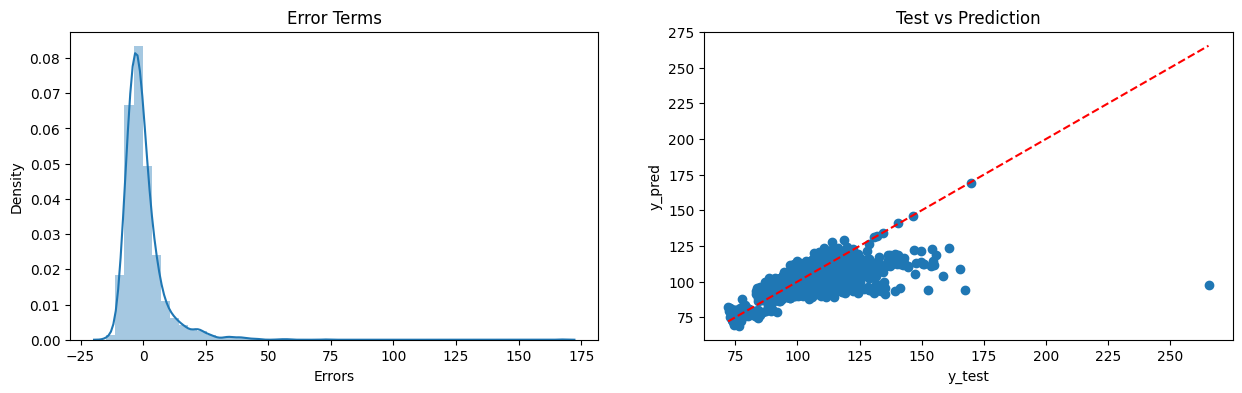

In [48]:
#Linear Regression

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=x_train_std.shape[1]-2)             # running RFE
rfe = rfe.fit(x_train_std, y_train)

LR = LinearRegression()
LR.fit(x_train_std.loc[:,rfe.support_], y_train)



pred1 = LR.predict(x_train_std.loc[:,rfe.support_])
pred2 = LR.predict(x_test_std.loc[:,rfe.support_])

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',LR.coef_)
print('The Intercept of the Regresion Model was found to be ',LR.intercept_)
print()

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-5.29557931e-01  4.81742179e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.29278627e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.17240651e-02 -4.46250611e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -8.91579778e-03 -0.00000000e+00
 -2.17347643e-02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.49016737e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -6.48875463e-02  0.00000000e+00 -1.64626084e-02
  0.00000000e+00 -1.00914595e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.60297620e-01  3.71275773e-02
 -0.00000000e+00 -0.00000000e+00  1.44621892e-02  9.67023949e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0

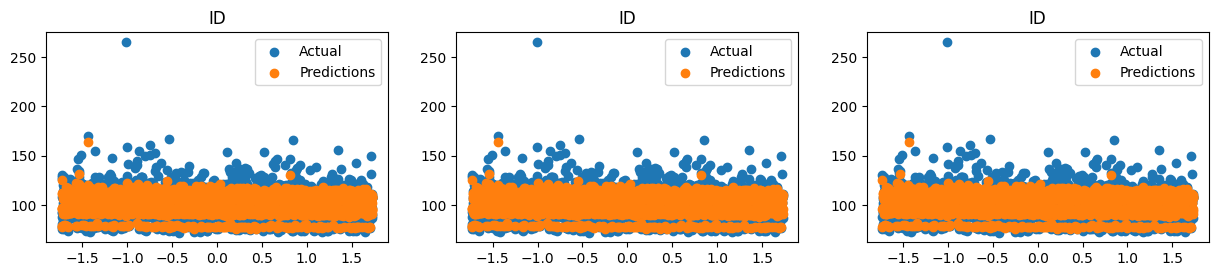



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.5685311484795327
Residual Sum of Squares RSS on Training Set ---> 237594.47880425878
Mean Squared Error on Training Set ---> 70.56563
Root Mean Squared Error on Training Set ---> 8.40034


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.6250127331291082
Residual Sum of Squares RSS on Testing Set ---> 47183.867007954555
Mean Squared Error on Testing Set ---> 56.03785
Root Mean Squared Error on Testing Set ---> 7.48584


--------------------Plotting Residual Plots--------------------


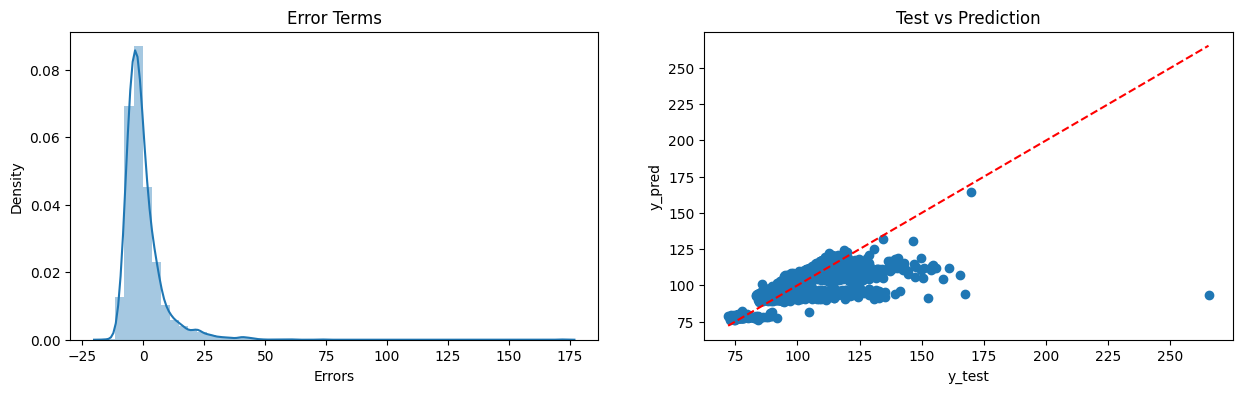

In [50]:
#Creating a Lasso Regression model
from sklearn.linear_model import Lasso

rfe = RFE(lm,n_features_to_select=x_train_std.shape[1]-2)             # running RFE
rfe = rfe.fit(x_train_std, y_train)

LLR = Lasso(alpha = 0.1).fit(x_train_std.loc[:,rfe.support_], y_train)



preds1 = LLR.predict(x_train_std.loc[:,rfe.support_])
preds2 = LLR.predict(x_test_std.loc[:,rfe.support_])


print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',LLR.coef_)
print('The Intercept of the Regresion Model was found to be ',LLR.intercept_)

Evaluate(1, preds1, preds2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-4.85729452e-01  8.90743764e-01 -3.95077130e-01  1.74847987e-01
 -9.79709360e-02  7.04879432e-03  1.13548240e-01  0.00000000e+00
  2.82394017e-01  3.44321708e-01  3.32947425e-01  5.18231594e-02
 -1.58210468e-01 -2.29866663e-02  2.58053687e-01 -8.91483436e-02
  0.00000000e+00 -5.87267081e-01 -5.02598890e-01 -4.82356312e-01
 -1.86084870e-01 -2.37899373e-03  1.16703078e-01  1.51818028e-01
 -5.84922258e-01 -4.03721390e-01  1.65239665e-01 -6.86909430e-01
 -4.45655619e-02 -6.16077261e-03  1.65259344e-01 -8.12274302e-02
  1.65259582e-01 -2.19026122e-01 -4.45680208e-02 -3.41261850e-02
 -3.20100315e-02  4.18662091e-02  5.47470582e-03 -2.84242080e-01
 -1.29883768e+00  2.57155374e-01  6.01028800e-01  1.53451312e-02
  0.00000000e+00 -7.02839900e-02  8.43773676e-02 -0.00000000e+00
 -0.00000000e+00 -4.14491607e-01 -1.55553551e

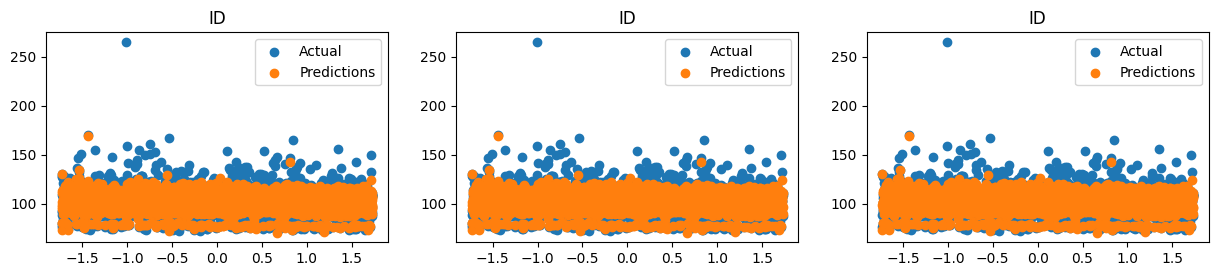



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.5873189700502519
Residual Sum of Squares RSS on Training Set ---> 227248.6968127374
Mean Squared Error on Training Set ---> 67.49293
Root Mean Squared Error on Training Set ---> 8.21541


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.5976295178994163
Residual Sum of Squares RSS on Testing Set ---> 50629.43996414983
Mean Squared Error on Testing Set ---> 60.12998
Root Mean Squared Error on Testing Set ---> 7.75435


--------------------Plotting Residual Plots--------------------


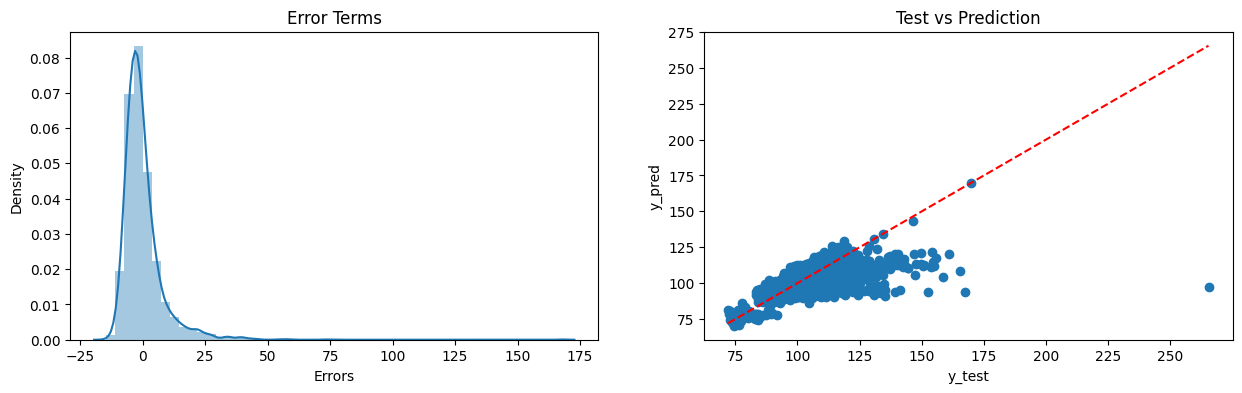

In [52]:
#Creating a ElasticNet Regression model
from sklearn.linear_model import ElasticNet

ENR = ElasticNet(l1_ratio = 0.4,alpha = 0.01,max_iter = 10000).fit(x_train_std,y_train)
pred1 = ENR.predict(x_train_std)
pred2 = ENR.predict(x_test_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',ENR.coef_)
print('The Intercept of the Regresion Model was found to be ',ENR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-4.96145796e-01  9.15510521e-01 -4.40430827e-01  2.53098500e-01
 -9.29806656e-02  1.37952384e-02  2.20516725e-01  0.00000000e+00
  3.41338968e-01  5.04133466e-01  5.19513089e-01  6.59394672e-02
 -1.55351244e-01 -1.60006253e-01  2.62916878e-01 -7.51002803e-02
  7.18997032e-02 -4.71253031e-01 -6.62828859e-01 -5.80711288e-01
 -2.55314257e-01  1.08831552e-02  1.29427778e-01  3.36326813e-01
 -4.44857966e-01 -5.21530609e-01  1.84425675e-01 -8.08038731e-01
 -4.69601247e-02  1.10887766e-01  1.84425675e-01 -1.11608840e-01
  1.84425675e-01 -2.15353263e-01 -4.69601247e-02 -4.51202229e-02
 -4.48539607e-02  4.39199387e-02 -9.07027782e-02 -3.49692222e-01
 -1.99836241e+00  2.79518625e-01  6.17355608e-01 -7.63606717e-03
  5.28987334e-01 -5.09484756e-02  9.69296412e-02 -3.16076452e-01
  1.14117871e-02 -3.54729554e-01 -1.75079550e

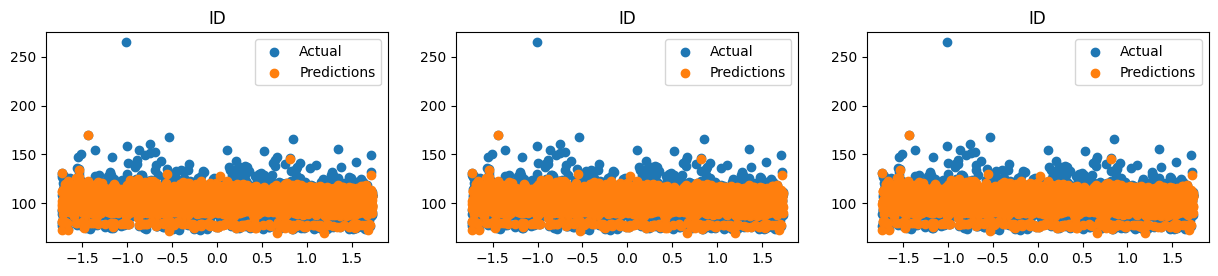



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.5885021417359092
Residual Sum of Squares RSS on Training Set ---> 226597.16644386153
Mean Squared Error on Training Set ---> 67.29943
Root Mean Squared Error on Training Set ---> 8.20362


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.5902813110503489
Residual Sum of Squares RSS on Testing Set ---> 51554.0495318468
Mean Squared Error on Testing Set ---> 61.22809
Root Mean Squared Error on Testing Set ---> 7.82484


--------------------Plotting Residual Plots--------------------


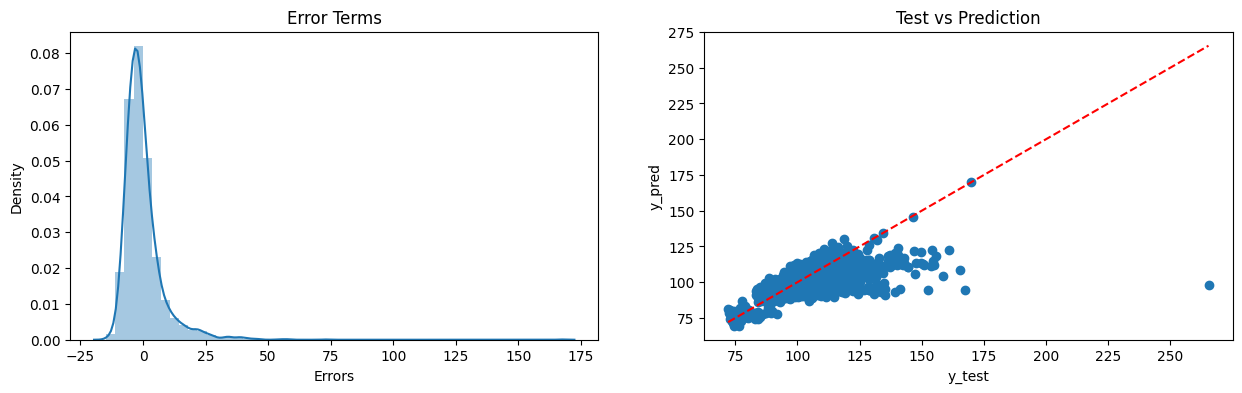

In [57]:
#Creating a Ridge Regression model
from sklearn.linear_model import Ridge

RR = Ridge(alpha = 10,max_iter = 10000).fit(x_train_std,y_train)
pred1 =RR.predict(x_train_std)
pred2 = RR.predict(x_test_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',RR.coef_)
print('The Intercept of the Regresion Model was found to be ',RR.intercept_)

Evaluate(3, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>



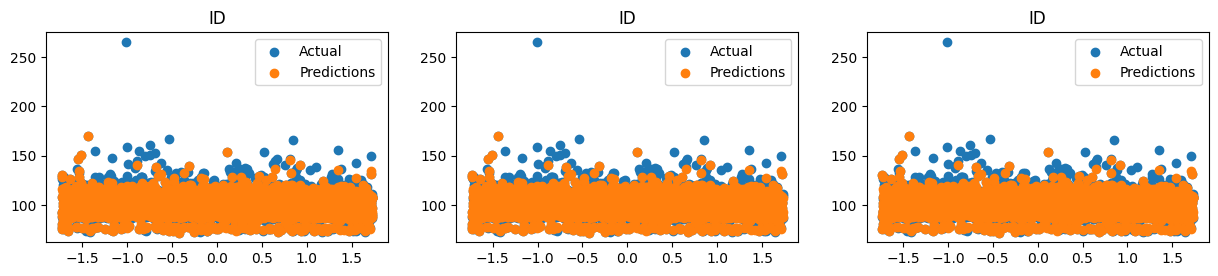



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.7305047839718155
Residual Sum of Squares RSS on Training Set ---> 148401.38556194215
Mean Squared Error on Training Set ---> 44.07526
Root Mean Squared Error on Training Set ---> 6.63892


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.5178372470076138
Residual Sum of Squares RSS on Testing Set ---> 60669.53527042004
Mean Squared Error on Testing Set ---> 72.05408
Root Mean Squared Error on Testing Set ---> 8.48847


--------------------Plotting Residual Plots--------------------


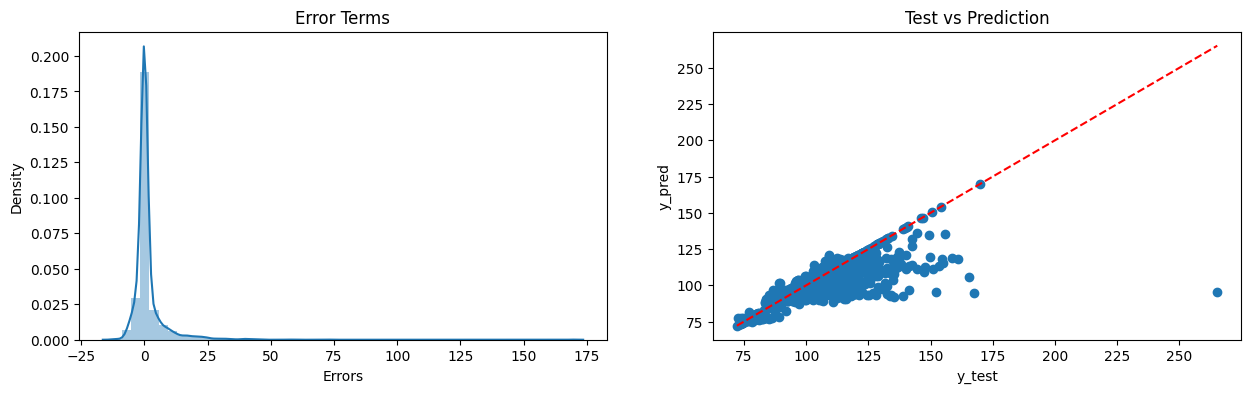

In [63]:
#Creating a SVR Regression model
from sklearn.svm import SVR

svr = SVR(C=100).fit(x_train_std,y_train)
pred1 = svr.predict(x_train_std)
pred2 = svr.predict(x_test_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
# print('The Coeffecient of the Regresion Model was found to be ',svr.coef_)
# print('The Intercept of the Regresion Model was found to be ',svr.intercept_)

Evaluate(4, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>



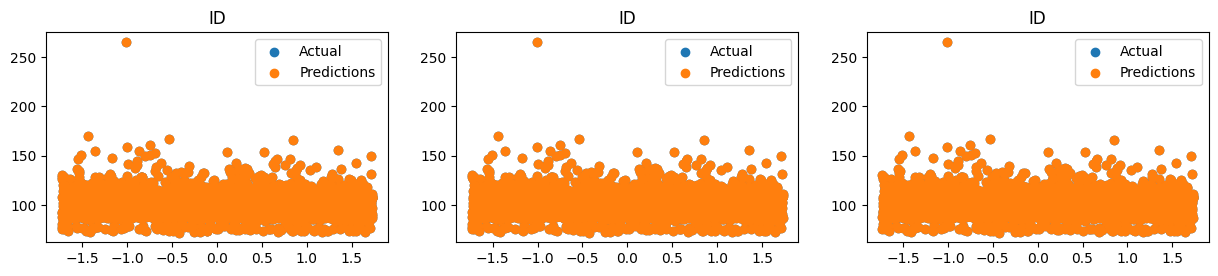



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 1.0
Residual Sum of Squares RSS on Training Set ---> 0.0
Mean Squared Error on Training Set ---> 0.0
Root Mean Squared Error on Training Set ---> 0.0


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.16587630631333794
Residual Sum of Squares RSS on Testing Set ---> 104956.04759999996
Mean Squared Error on Testing Set ---> 124.65089
Root Mean Squared Error on Testing Set ---> 11.16472


--------------------Plotting Residual Plots--------------------


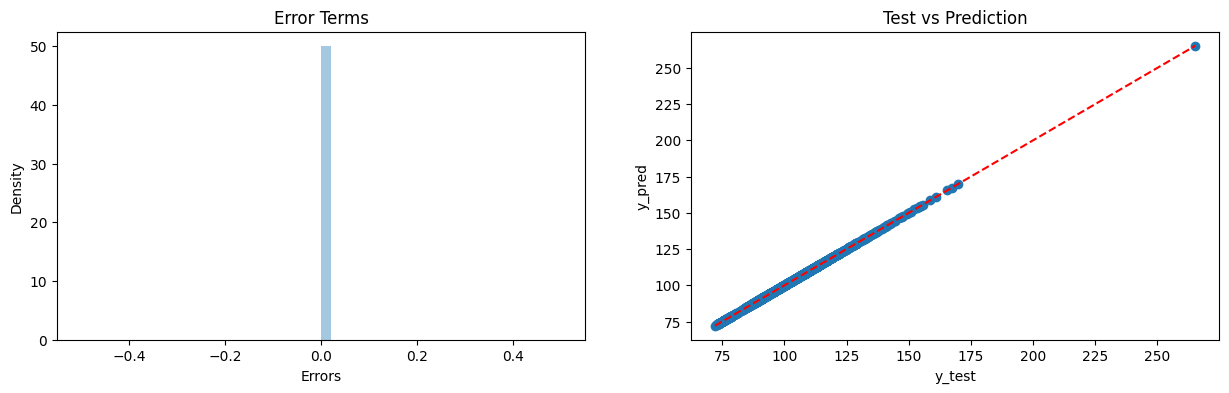

In [65]:
#Creating a DecisionTree Regression model
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(x_train_std,y_train)
pred1 = dtr.predict(x_train_std)
pred2 = dtr.predict(x_test_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
# print('The Coeffecient of the Regresion Model was found to be ',ENR.coef_)
# print('The Intercept of the Regresion Model was found to be ',ENR.intercept_)

Evaluate(5, pred1, pred2)

In [ ]:
#Creating Extra Trees Regressoe
from sklearn.tree import ExtraTreeRegressor
etr = ExtraTreeRegressor().fit(x_train_std,y_train)
pred1 = ENR.predict(x_train_std)
pred2 = ENR.predict(x_test_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',ENR.coef_)
print('The Intercept of the Regresion Model was found to be ',ENR.intercept_)

Evaluate(2, pred1, pred2)

In [ ]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)',"Rige Regression(RR)"]
EMC

In [ ]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train_R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2_Scores Comparison for various Regression Models')
plt.xlabel('R2_Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.002, i-0.05, str(v*100), color='blue')
plt.xlim([0,0.15])
plt.show()

In [ ]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(4), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(4)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(4),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,35])
plt.show()
